## Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Importing the dataset
dataset = pd.read_excel('Dataset3.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

[[0.0 1.0 0.5 1.5]
 [0.0 1.0 0.5 2.5]
 [0.0 1.0 0.5 3.5]
 ...
 [1.0 0.0 25.0 18.0]
 [1.0 0.0 25.0 19.0]
 [1.0 0.0 25.0 20.0]]


In [1]:
table = dataset.describe()

NameError: name 'dataset' is not defined

In [13]:
from openpyxl import load_workbook
path = "E:\PhD\Machine Learning\Final outputs_paper1.xlsx"

book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

#path = "E:/PhD/Machine Learning/output1.xlsx"
#writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
table.to_excel(writer, sheet_name = 'Dataset summary')
writer.close()

## Alternative - Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Importing the dataset
dataset = pd.read_excel('Dataset3.xlsx')
X = dataset[['Charge_type', 'Charge_size', 'Standoff_distance']]
y = dataset['Incident_pressure']
feature_names = X.columns
print (X)

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Charge_type'])], remainder='passthrough')
X = ct.fit_transform(X)

#Getting the feature names
new_feature_names = ct.get_feature_names_out(feature_names)
print (new_feature_names)
print (X)

#Turning back into a dataframe
X = pd.DataFrame(X, columns= new_feature_names)
print (X)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print (X_train)

    Charge_type  Charge_size  Standoff_distance
0           TNT          0.5                1.5
1           TNT          0.5                2.5
2           TNT          0.5                3.5
3           TNT          0.5                4.5
4           TNT          0.5                5.5
..          ...          ...                ...
541       CompB         25.0               16.0
542       CompB         25.0               17.0
543       CompB         25.0               18.0
544       CompB         25.0               19.0
545       CompB         25.0               20.0

[546 rows x 3 columns]
['encoder__Charge_type_CompB' 'encoder__Charge_type_TNT'
 'remainder__Charge_size' 'remainder__Standoff_distance']
[[ 0.   1.   0.5  1.5]
 [ 0.   1.   0.5  2.5]
 [ 0.   1.   0.5  3.5]
 ...
 [ 1.   0.  25.  18. ]
 [ 1.   0.  25.  19. ]
 [ 1.   0.  25.  20. ]]
     encoder__Charge_type_CompB  encoder__Charge_type_TNT  \
0                           0.0                       1.0   
1                  

## Calling the Random Forest Regressor

In [2]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 67)

## Applying Grid Search to find the best model and the best parameters

In [3]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25],'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.9676792986846472
Best Parameters: {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 2}


## Training the Decision Tree Regression model on the Training set

In [3]:
regressor = RandomForestRegressor(n_estimators = 100,
                                  max_depth = 8,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 67)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, random_state=67)

## Save the model to disk

In [4]:
filename = 'finalized_model_RF.sav'
pickle.dump(regressor, open(filename, 'wb'))

## Create a KFold object with 5 splits 

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())
regressor

[0.99631345 0.96080938 0.94419266 0.99175597 0.98453152]
0.9755205954831236


RandomForestRegressor(max_depth=8, random_state=67)

## Load the model from disk

In [1]:
import pickle
filename = 'finalized_model_RF.sav'
loaded_regressor = pickle.load(open(filename, 'rb'))

C:\Users\Chathura Gamage\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Chathura Gamage\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Predicting the Test set results

In [7]:
y_pred = regressor.predict(X_test)
#print (y_pred)
#print (y_test)
#print (len(y_pred))
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)
print(file)

[[ 110.94  108.77]
 [7813.25 8013.45]
 [ 142.48  144.28]
 [ 374.8   274.19]
 [ 881.59 1007.45]
 [ 185.01  196.22]
 [ 127.26  131.96]
 [ 171.12  171.51]
 [1665.72 1731.23]
 [ 133.38  136.45]
 [ 320.29  309.78]
 [ 522.13  524.14]
 [ 128.28  130.67]
 [ 142.16  130.75]
 [ 366.4   354.25]
 [ 123.8   119.43]
 [ 118.82  117.43]
 [ 142.02  124.04]
 [ 114.62  113.14]
 [ 119.71  120.34]
 [2762.83 3132.78]
 [ 125.61  125.44]
 [ 125.78  124.65]
 [ 114.98  113.93]
 [ 315.03  300.84]
 [ 113.52  111.93]
 [ 307.66  263.48]
 [ 122.44  123.06]
 [ 151.18  151.21]
 [ 119.36  119.65]
 [ 206.6   207.89]
 [ 156.95  144.44]
 [ 118.43  118.21]
 [ 105.87  103.93]
 [ 162.7   173.54]
 [ 117.84  116.69]
 [ 220.46  219.04]
 [ 138.51  139.79]
 [ 125.59  124.99]
 [ 131.39  133.57]
 [ 117.7   116.81]
 [ 128.28  132.17]
 [ 466.68  524.32]
 [ 152.86  152.22]
 [ 261.56  241.93]
 [ 148.27  152.24]
 [ 148.59  156.44]
 [ 120.78  118.46]
 [ 110.93  110.56]
 [2357.9  2751.58]
 [ 117.66  114.36]
 [ 202.35  205.96]
 [ 128.83  1

## SHAP

In [1]:
import shap
#print (shap.__version__)

In [9]:
# Create object that can calculate shap values for an ensemble tree model
explainer = shap.TreeExplainer(regressor)

In [10]:
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

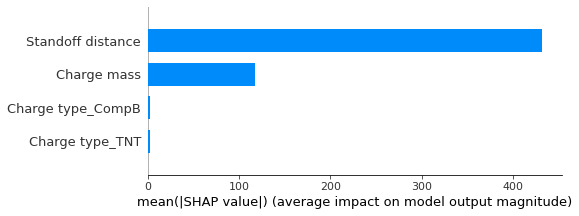

None


<Figure size 1440x360 with 0 Axes>

In [11]:
#Summary plot type 1
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
shap.summary_plot(shap_values, X_train, feature_names = features, plot_type="bar")
print (plt.gcf().set_size_inches(20,5))

[1]
labels ['']


Text(482.5464500000001, 0.5, 'Feature value')

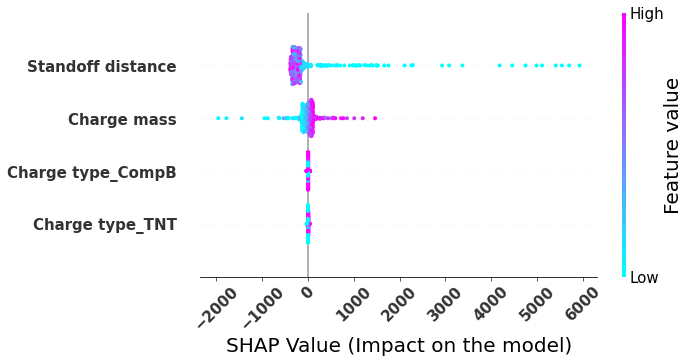

In [12]:
#Summary plot type 2
features = ['Explosive type-CompB', 'Explosive type-TNT', 'Explosive mass', 'Standoff distance']
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
shap.summary_plot(shap_values, X_train, feature_names=features, show=False,cmap = "cool")
# Get the current figure and axes objects.
fig = plt.gcf()
print (plt.get_fignums())
print ("labels",plt.get_figlabels())
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20)
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
#plt.xlim([-3000,7000])
plt.xticks(rotation=45)
#cb = plt.colorbar()
#cb.set_ticks([2,19])

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Feature value", fontsize=20)
#cb_ax.set_aspect(aspect = 1)
#print (cb_ax.get_xlim())
#print (cb_ax.get_ylim())
#print (cb_ax.get_xbound())
#print (cb_ax.get_ybound())
#cb_ax.set_xlim(0,0.0001)

#cb.set_xticklabels(['Low', 'High'])
#ax.cb.set_label("Feature Values",fontsize = 20)

In [12]:
#features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
#Turning back into a dataframe
X_train_df = pd.DataFrame(X_train, columns= features)
X_train_df

,Charge type_CompB,Charge type_TNT,Charge mass,Standoff distance
118,NaN,NaN,NaN,NaN
400,NaN,NaN,NaN,NaN
543,NaN,NaN,NaN,NaN
202,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN
...,...,...,...,...
70,NaN,NaN,NaN,NaN
277,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN
359,NaN,NaN,NaN,NaN


In [14]:
#X_train
X_train.columns=features
print (X_train)

     Charge type_CompB  Charge type_TNT  Charge mass  Standoff distance
462                1.0              0.0         18.0               17.0
252                0.0              1.0         24.5                6.5
217                0.0              1.0         21.5                9.5
22                 0.0              1.0          1.5                4.5
41                 0.0              1.0          3.5                4.5
..                 ...              ...          ...                ...
526                1.0              0.0         25.0                1.0
53                 0.0              1.0          3.5               16.5
350                1.0              0.0          8.0                5.0
79                 0.0              1.0          7.5                4.5
520                1.0              0.0         24.0               15.0

[436 rows x 4 columns]


In [25]:
for i in features:
        shap_v[i].dtype
        print (i)
        #print (shap_v[i])
        #print (X_train_df[i].dtype)
        print (shap_v[i],X_train[i])
        #print ("X_train_df",i,X_train_df[i])

Charge type_CompB
0     -3.794860
1      3.841589
2      3.536420
3     -4.005238
4     -3.737077
         ...   
431   -2.714697
432    2.441355
433   -2.508151
434    3.506755
435   -3.820740
Name: Charge type_CompB, Length: 436, dtype: float64 118    0.0
400    1.0
543    1.0
202    0.0
165    0.0
      ... 
70     0.0
277    1.0
9      0.0
359    1.0
192    0.0
Name: Charge type_CompB, Length: 436, dtype: float64
Charge type_TNT
0      0.098979
1     -0.591158
2     -0.729741
3      0.155799
4      0.301706
         ...   
431    0.236138
432   -0.144580
433    0.018385
434   -0.099001
435    1.665873
Name: Charge type_TNT, Length: 436, dtype: float64 118    1.0
400    0.0
543    0.0
202    1.0
165    1.0
      ... 
70     1.0
277    0.0
9      1.0
359    0.0
192    1.0
Name: Charge type_TNT, Length: 436, dtype: float64
Charge mass
0       -7.613600
1        2.899603
2      105.711659
3       63.916369
4       31.713136
          ...    
431    -71.152198
432   -138.301586
433   -1

In [27]:
shap_v = pd.DataFrame(shap_values)
#feature_list = df.columns
shap_v.columns = features
corr_list = list()
for i in features:
        b = np.corrcoef(shap_v[i],X_train[i].astype(float))[1][0]
        corr_list.append(b)
print (corr_list)

[0.33057265276352177, 0.06533594155460666, 0.5909840266757423, -0.5010621118851039]


In [18]:
shap_v = pd.DataFrame(shap_values)
#feature_list = df.columns
shap_v.columns = features
corr_list = list()
for i in features:
        b = np.corrcoef(shap_v[i],X_train_df[i].astype(float))#[1][0]
        corr_list.append(b)
print (corr_list)

[array([[ 1., nan],
       [nan, nan]]), array([[ 1., nan],
       [nan, nan]]), array([[ 1., nan],
       [nan, nan]]), array([[ 1., nan],
       [nan, nan]])]


In [12]:
print (features)
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    #feature_list = df.columns
    shap_v.columns = features
    df.columns = df_features
    print ("features",features)
    print ("df_features", df_features)
    #df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i,j in features, df_features:
        print (i,j)
        b = np.corrcoef(shap_v[i],df[j])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(features),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(8,5),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)", fontsize=20)
    ax.set_ylabel("Features", fontsize=20)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
ABS_SHAP(shap_values,X_train)

['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']


NameError: name 'df_features' is not defined

Text(0, 0.5, "['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']")

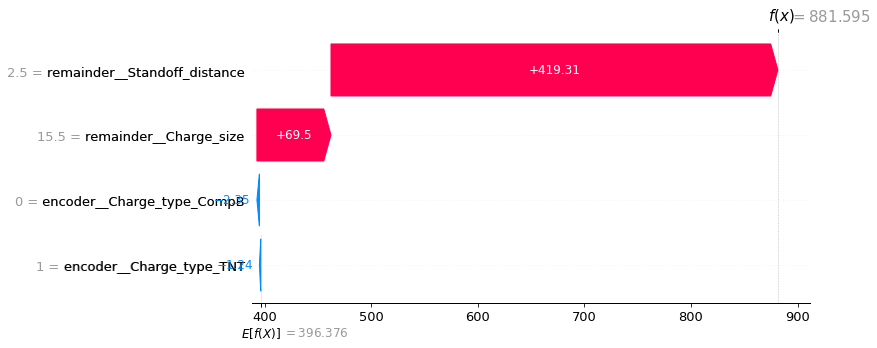

In [20]:
#print (X_test)
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
#print (X_test)
#Waterfall Plot (for an instance)
explainer2 = shap.Explainer(regressor.predict, X_test)
#X_test.columns=features
shap_values2 = explainer2(X_test)

shap.waterfall_plot(shap_values2[4], show=False)
plt.gcf()
#print (plt.get_fignums())


plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')
#plt.tick_params(y, pad = 10)
#plt.xlabel("SHAP Value (Impact on the model)", fontsize=30)
plt.ylabel(features, fontsize = 30,weight='bold')
#print (plt.bar_label())
#left, right = plt.xlim()
#print (left, right)
#plt.xlim(left = 450)
#plt.xticks(fontsize = 15,weight='bold')

(array([113.52, 113.52]),
 [Text(113.51526001873566, 1, '$f(x)$'),
  Text(113.51526002873565, 1, '$ = 113.515$')])

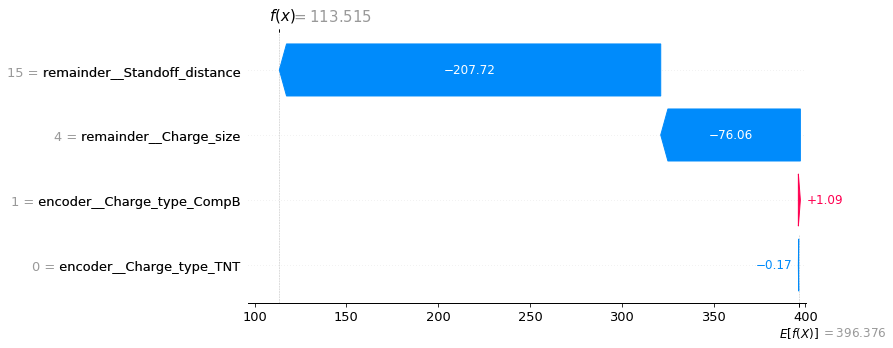

In [14]:
shap.waterfall_plot(shap_values2[25], show=False)
plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

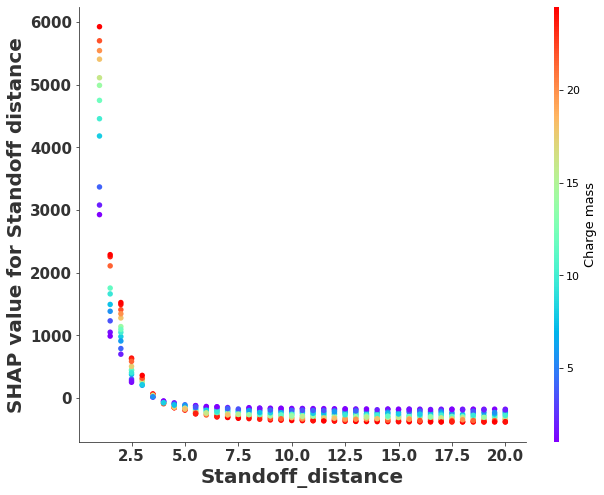

In [15]:
#Partial Dependenace Plot
shap.dependence_plot(3, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Standoff distance", fontsize = 20,weight='bold')
plt.xlabel("Standoff_distance",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')

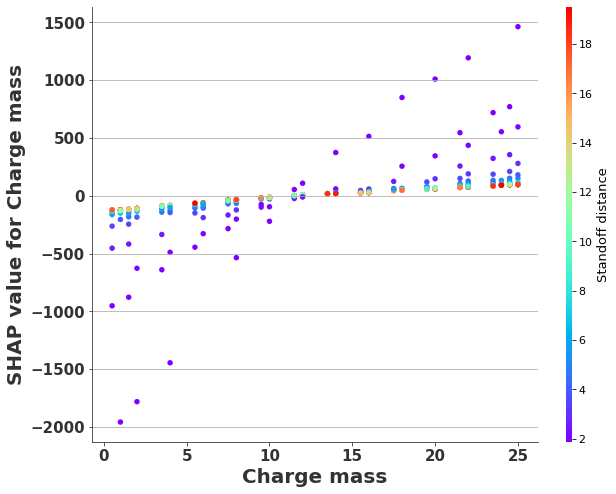

In [20]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')

(-200.0, 200.0)

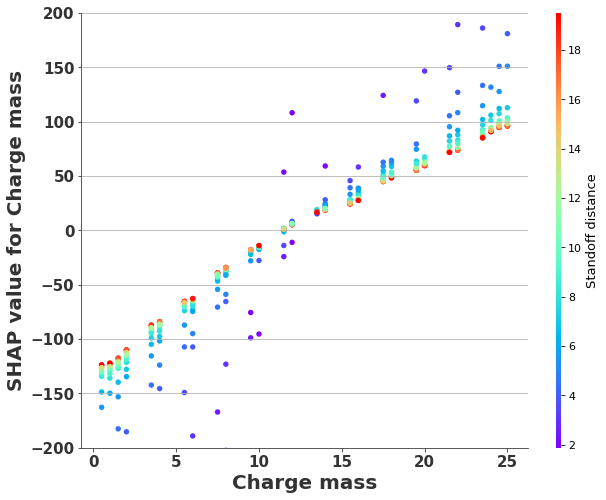

In [21]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')
plt.ylim([-200,200])

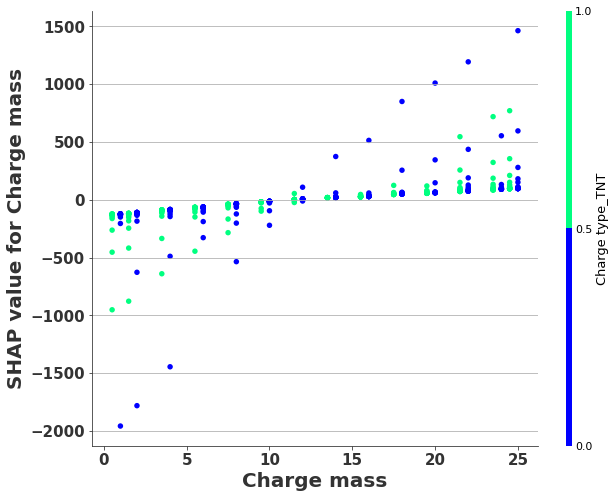

In [31]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, interaction_index = 1, show=False, dot_size = 30, cmap=plt.get_cmap("winter"))
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')

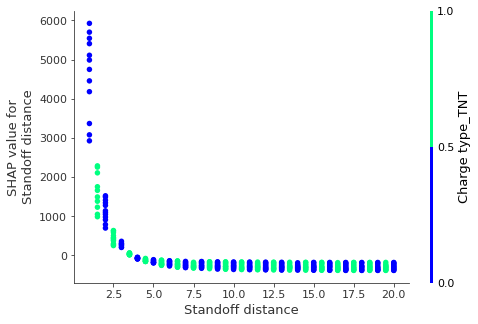

In [32]:
#Partial Dependenace Plot
shap.dependence_plot(3, shap_values, X_train, feature_names = features, interaction_index = 1, show=False, dot_size = 30, cmap=plt.get_cmap("winter"))

In [19]:
#Force plot (Instance representation)
row_to_show = 5
shap_values3 = explainer.shap_values(X_test.iloc[row_to_show])
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values3, X_test.iloc[row_to_show])

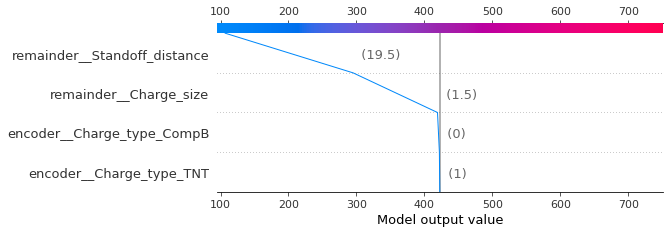

In [20]:
shap.decision_plot(explainer.expected_value, shap_values3,  X_test.iloc[row_to_show])